In [1]:
!pip3 install -U ucimlrepo 

Defaulting to user installation because normal site-packages is not writeable


In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [6]:
print(adult.dtype)

None


In [3]:
import urllib.request
import zipfile
import os
import shutil

# Step 1: Prepare the Data
# Define URL and download path
url = "https://archive.ics.uci.edu/static/public/2/adult.zip"
download_path = "adult.zip"

# Download the ZIP file
urllib.request.urlretrieve(url, download_path)

# Extract the ZIP file
with zipfile.ZipFile(download_path, "r") as zip_ref:
    zip_ref.extractall("adult")  # Extract to a folder named 'adult'

# Move the contents from the `adult` directory to the current directory
extracted_folder = "adult"
for item in os.listdir(extracted_folder):
    source = os.path.join(extracted_folder, item)
    destination = os.path.join(".", item)
    if os.path.isdir(source):
        shutil.move(source, destination)
    else:
        shutil.move(source, destination)

# Clean up by removing the extracted folder and downloaded ZIP file
shutil.rmtree(extracted_folder)  # Remove the extracted folder
os.remove(download_path)  # Remove the downloaded ZIP file

print("Dataset downloaded and prepared successfully!")

Dataset downloaded and prepared successfully!


In [8]:
print(type(adult.data.features))
print(type(adult.data.targets))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [10]:
import pandas as pd

# Define column names (as described in UCI documentation)
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Load training data
train_path = "adult.data"
adult_train = pd.read_csv(train_path, header=None, names=columns, na_values=" ?", skipinitialspace=True)

# Load test data (skip the first row with metadata)
test_path = "adult.test"
adult_test = pd.read_csv(test_path, header=None, names=columns, skiprows=1, na_values=" ?", skipinitialspace=True)


# Display dataset summary
print(adult_train.head())
print(adult_train.info())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [19]:
print(adult_train.isnull().sum())
print(adult_test.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


 Convert income to binary (<=50K -> 0, >50K -> 1)

In [20]:
# Encode target variable: Convert income to binary (<=50K -> 0, >50K -> 1)
adult_train['income'] = adult_train['income'].apply(lambda x: 1 if x.strip() == ">50K" else 0)

In [21]:
# Split Features and Target
X = adult_train.drop(columns=["income"])
y = adult_train["income"]

In [22]:
# Encode Categorical Variables
# Convert categorical columns to dummy/one-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 100 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        32561 non-null  int64
 1   fnlwgt                                     32561 non-null  int64
 2   education-num                              32561 non-null  int64
 3   capital-gain                               32561 non-null  int64
 4   capital-loss                               32561 non-null  int64
 5   hours-per-week                             32561 non-null  int64
 6   workclass_Federal-gov                      32561 non-null  bool 
 7   workclass_Local-gov                        32561 non-null  bool 
 8   workclass_Never-worked                     32561 non-null  bool 
 9   workclass_Private                          32561 non-null  bool 
 10  workclass_Self-emp-inc                     32

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [28]:
# Train-Test Split (with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [29]:
# Train a Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

In [30]:
# Evaluate the Model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7954754836728427

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7417
           1       0.66      0.32      0.43      2352

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [31]:
!pip3 install -U diffprivlib 

Defaulting to user installation because normal site-packages is not writeable


In [32]:
from diffprivlib.models import GaussianNB

In [33]:
clf = GaussianNB()
clf.fit(X_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


GaussianNB(accountant=BudgetAccountant(spent_budget=[(1.0, 0)]),
           bounds=(array([1.7000e+01, 1.4878e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+...
       1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00])))

In [34]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
print("Test accuracy: %f" % clf.score(X_test, y_test))

Test accuracy: 0.756782


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.0100
Accuracy: 0.7610
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      7417
           1       0.52      0.09      0.15      2352

    accuracy                           0.76      9769
   macro avg       0.65      0.53      0.51      9769
weighted avg       0.71      0.76      0.69      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.0121
Accuracy: 0.7592
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7417
           1       0.00      0.00      0.00      2352

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.66      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

Epsilon: 0.0146
Accuracy: 0.6754
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      7417
           1       0.15      0.08      0.10      2352

    accuracy                           0.68      9769
   macro avg       0.45      0.47      0.45      9769
weighted avg       0.60      0.68      0.63      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.0176
Accuracy: 0.7629
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      7417
           1       0.56      0.08      0.14      2352

    accuracy                           0.76      9769
   macro avg       0.66      0.53      0.50      9769
weighted avg       0.72      0.76      0.69      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.0212
Accuracy: 0.7571
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7417
           1       0.24      0.00      0.01      2352

    accuracy                           0.76      9769
   macro avg       0.50      0.50      0.43      9769
weighted avg       0.64      0.76      0.66      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.0256
Accuracy: 0.7592
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7417
           1       0.00      0.00      0.00      2352

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.66      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

Epsilon: 0.0309
Accuracy: 0.7218
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83      7417
           1       0.26      0.08      0.13      2352

    accuracy                           0.72      9769
   macro avg       0.51      0.50      0.48      9769
weighted avg       0.64      0.72      0.66      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.0373
Accuracy: 0.7592
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7417
           1       0.00      0.00      0.00      2352

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.66      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

Epsilon: 0.0450
Accuracy: 0.7361
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85      7417
           1       0.02      0.00      0.00      2352

    accuracy                           0.74      9769
   macro avg       0.39      0.49      0.43      9769
weighted avg       0.58      0.74      0.64      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.0543
Accuracy: 0.7572
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      7417
           1       0.44      0.03      0.06      2352

    accuracy                           0.76      9769
   macro avg       0.60      0.51      0.46      9769
weighted avg       0.69      0.76      0.67      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.0655
Accuracy: 0.7582
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7417
           1       0.25      0.00      0.00      2352

    accuracy                           0.76      9769
   macro avg       0.50      0.50      0.43      9769
weighted avg       0.64      0.76      0.66      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.0791
Accuracy: 0.7407
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      7417
           1       0.26      0.04      0.07      2352

    accuracy                           0.74      9769
   macro avg       0.51      0.50      0.46      9769
weighted avg       0.64      0.74      0.66      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.0954
Accuracy: 0.7592
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7417
           1       0.00      0.00      0.00      2352

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.66      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

Epsilon: 0.1151
Accuracy: 0.7592
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7417
           1       0.50      0.00      0.01      2352

    accuracy                           0.76      9769
   macro avg       0.63      0.50      0.43      9769
weighted avg       0.70      0.76      0.66      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.1389
Accuracy: 0.7547
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      7417
           1       0.04      0.00      0.00      2352

    accuracy                           0.75      9769
   macro avg       0.40      0.50      0.43      9769
weighted avg       0.59      0.75      0.65      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.1677
Accuracy: 0.7298
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84      7417
           1       0.08      0.01      0.02      2352

    accuracy                           0.73      9769
   macro avg       0.42      0.48      0.43      9769
weighted avg       0.59      0.73      0.65      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.2024
Accuracy: 0.7386
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      7417
           1       0.25      0.04      0.07      2352

    accuracy                           0.74      9769
   macro avg       0.50      0.50      0.46      9769
weighted avg       0.64      0.74      0.66      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.2442
Accuracy: 0.7438
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.85      7417
           1       0.06      0.00      0.01      2352

    accuracy                           0.74      9769
   macro avg       0.41      0.49      0.43      9769
weighted avg       0.59      0.74      0.65      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.2947
Accuracy: 0.7798
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      7417
           1       0.63      0.21      0.32      2352

    accuracy                           0.78      9769
   macro avg       0.71      0.59      0.59      9769
weighted avg       0.75      0.78      0.74      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.3556
Accuracy: 0.7471
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85      7417
           1       0.38      0.08      0.13      2352

    accuracy                           0.75      9769
   macro avg       0.57      0.52      0.49      9769
weighted avg       0.67      0.75      0.68      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.4292
Accuracy: 0.7560
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      7417
           1       0.29      0.01      0.02      2352

    accuracy                           0.76      9769
   macro avg       0.53      0.50      0.44      9769
weighted avg       0.65      0.76      0.66      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.5179
Accuracy: 0.7241
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83      7417
           1       0.34      0.15      0.21      2352

    accuracy                           0.72      9769
   macro avg       0.55      0.53      0.52      9769
weighted avg       0.67      0.72      0.68      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.6251
Accuracy: 0.7108
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      7417
           1       0.35      0.23      0.28      2352

    accuracy                           0.71      9769
   macro avg       0.56      0.55      0.55      9769
weighted avg       0.68      0.71      0.69      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.7543
Accuracy: 0.7096
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      7417
           1       0.26      0.11      0.16      2352

    accuracy                           0.71      9769
   macro avg       0.51      0.51      0.49      9769
weighted avg       0.64      0.71      0.66      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 0.9103
Accuracy: 0.6896
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      7417
           1       0.32      0.26      0.29      2352

    accuracy                           0.69      9769
   macro avg       0.55      0.54      0.55      9769
weighted avg       0.67      0.69      0.68      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 1.0985
Accuracy: 0.7335
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83      7417
           1       0.41      0.25      0.31      2352

    accuracy                           0.73      9769
   macro avg       0.60      0.57      0.57      9769
weighted avg       0.70      0.73      0.71      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 1.3257
Accuracy: 0.7415
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      7417
           1       0.37      0.11      0.17      2352

    accuracy                           0.74      9769
   macro avg       0.57      0.53      0.51      9769
weighted avg       0.67      0.74      0.68      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 1.5999
Accuracy: 0.7355
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84      7417
           1       0.39      0.18      0.25      2352

    accuracy                           0.74      9769
   macro avg       0.59      0.55      0.54      9769
weighted avg       0.69      0.74      0.70      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 1.9307
Accuracy: 0.7516
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      7417
           1       0.37      0.05      0.08      2352

    accuracy                           0.75      9769
   macro avg       0.57      0.51      0.47      9769
weighted avg       0.67      0.75      0.67      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 2.3300
Accuracy: 0.7277
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      7417
           1       0.37      0.18      0.24      2352

    accuracy                           0.73      9769
   macro avg       0.57      0.54      0.54      9769
weighted avg       0.68      0.73      0.69      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 2.8118
Accuracy: 0.7655
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86      7417
           1       0.56      0.12      0.20      2352

    accuracy                           0.77      9769
   macro avg       0.67      0.55      0.53      9769
weighted avg       0.72      0.77      0.70      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 3.3932
Accuracy: 0.7465
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      7417
           1       0.44      0.18      0.25      2352

    accuracy                           0.75      9769
   macro avg       0.61      0.55      0.55      9769
weighted avg       0.70      0.75      0.70      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 4.0949
Accuracy: 0.7552
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      7417
           1       0.48      0.19      0.28      2352

    accuracy                           0.76      9769
   macro avg       0.63      0.56      0.56      9769
weighted avg       0.71      0.76      0.71      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 4.9417
Accuracy: 0.7883
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      7417
           1       0.61      0.33      0.43      2352

    accuracy                           0.79      9769
   macro avg       0.71      0.63      0.65      9769
weighted avg       0.77      0.79      0.76      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 5.9636
Accuracy: 0.7501
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      7417
           1       0.46      0.21      0.29      2352

    accuracy                           0.75      9769
   macro avg       0.62      0.57      0.57      9769
weighted avg       0.71      0.75      0.71      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 7.1969
Accuracy: 0.7904
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      7417
           1       0.61      0.35      0.45      2352

    accuracy                           0.79      9769
   macro avg       0.72      0.64      0.66      9769
weighted avg       0.77      0.79      0.77      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 8.6851
Accuracy: 0.7717
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      7417
           1       0.56      0.23      0.32      2352

    accuracy                           0.77      9769
   macro avg       0.68      0.59      0.59      9769
weighted avg       0.74      0.77      0.73      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 10.4811
Accuracy: 0.7909
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      7417
           1       0.59      0.43      0.50      2352

    accuracy                           0.79      9769
   macro avg       0.71      0.67      0.68      9769
weighted avg       0.78      0.79      0.78      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 12.6486
Accuracy: 0.7700
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      7417
           1       0.56      0.22      0.31      2352

    accuracy                           0.77      9769
   macro avg       0.67      0.58      0.59      9769
weighted avg       0.74      0.77      0.73      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 15.2642
Accuracy: 0.7763
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      7417
           1       0.57      0.31      0.40      2352

    accuracy                           0.78      9769
   macro avg       0.69      0.62      0.63      9769
weighted avg       0.75      0.78      0.75      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 18.4207
Accuracy: 0.7867
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      7417
           1       0.59      0.39      0.47      2352

    accuracy                           0.79      9769
   macro avg       0.71      0.65      0.67      9769
weighted avg       0.77      0.79      0.77      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 22.2300
Accuracy: 0.7921
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      7417
           1       0.61      0.39      0.47      2352

    accuracy                           0.79      9769
   macro avg       0.72      0.65      0.67      9769
weighted avg       0.77      0.79      0.77      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 26.8270
Accuracy: 0.8112
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7417
           1       0.62      0.56      0.59      2352

    accuracy                           0.81      9769
   macro avg       0.74      0.72      0.73      9769
weighted avg       0.81      0.81      0.81      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 32.3746
Accuracy: 0.8109
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7417
           1       0.61      0.59      0.60      2352

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 39.0694
Accuracy: 0.8055
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      7417
           1       0.58      0.70      0.64      2352

    accuracy                           0.81      9769
   macro avg       0.74      0.77      0.75      9769
weighted avg       0.82      0.81      0.81      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 47.1487
Accuracy: 0.8166
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      7417
           1       0.61      0.67      0.64      2352

    accuracy                           0.82      9769
   macro avg       0.75      0.77      0.76      9769
weighted avg       0.82      0.82      0.82      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 56.8987
Accuracy: 0.7184
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.67      0.78      7417
           1       0.46      0.88      0.60      2352

    accuracy                           0.72      9769
   macro avg       0.70      0.77      0.69      9769
weighted avg       0.83      0.72      0.74      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 68.6649
Accuracy: 0.7858
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      7417
           1       0.54      0.80      0.64      2352

    accuracy                           0.79      9769
   macro avg       0.73      0.79      0.75      9769
weighted avg       0.83      0.79      0.80      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 82.8643
Accuracy: 0.7247
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79      7417
           1       0.46      0.88      0.61      2352

    accuracy                           0.72      9769
   macro avg       0.70      0.78      0.70      9769
weighted avg       0.83      0.72      0.74      9769

--------------------------------------------------


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\diffprivlib\models\naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


Epsilon: 100.0000
Accuracy: 0.7443
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      7417
           1       0.48      0.86      0.62      2352

    accuracy                           0.74      9769
   macro avg       0.71      0.78      0.71      9769
weighted avg       0.83      0.74      0.76      9769

--------------------------------------------------


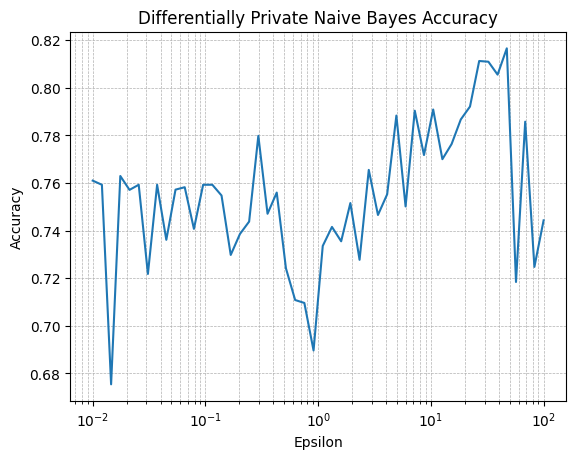

In [41]:
import numpy as np
epsilons = np.logspace(-2, 2, 50)  # Logarithmically spaced epsilon values
accuracy = []

for epsilon in epsilons:
    clf = GaussianNB(epsilon=epsilon)
    clf.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)

    # Print accuracy and classification report
    print(f"Epsilon: {epsilon:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Plot Accuracy vs. Epsilon
import matplotlib.pyplot as plt

plt.semilogx(epsilons, accuracy)
plt.title("Differentially Private Naive Bayes Accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

This was the best performing epsilon after trying out various epsilons

Epsilon: 47.1487

Accuracy: 0.8166

Classification Report:


                      precision recall    f1-score  support
           0          0.89      0.86      0.88      7417
           1          0.61      0.67      0.64      2352

    accuracy                           0.82      9769
    macro avg          0.75      0.77      0.76      9769
    weighted avg       0.82      0.82      0.82      9769

Performance was generally lower except for a few epsilons.

- The regular Naive Bayes model achieved an accuracy of 79.55%
- The differentially private Naive Bayes with an epsilon value of 47.1487 achieved a slightly higher accuracy of 81.66%:
- In general, most epsilon values in the private model resulted in lower accuracy scores than the regular Naive Bayes. However, for a few higher epsilon values, the accuracy was higher than the regular model.

- Lower epsilons have lower performance. lower epsilons depict stricter privacy. In my opinion slight decrease in model performance is an acceptable trade-off for ensuring privacy, especially in high-stakes applications where data protection is critical. 